In [1]:
import numpy as np
from numpy import asarray
from numpy import savetxt
import matplotlib.pyplot as plt

def rk4_step(y0, x0, f, h, f_args = {}):
    ''' Simple python implementation for one RK4 step. 
        Inputs:
            y_0    - M x 1 numpy array specifying all variables of the ODE at the current time step
            x_0    - current time step
            f      - function that calculates the derivates of all variables of the ODE
            h      - time step size
            f_args - Dictionary of additional arguments to be passed to the function f
        Output:
            yp1 - M x 1 numpy array of variables at time step x0 + h
            xp1 - time step x0+h
    '''
    k1 = h * f(y0, x0, **f_args)
    k2 = h * f(y0 + k1/2., x0 + h/2., **f_args)
    k3 = h * f(y0 + k2/2., x0 + h/2., **f_args)
    k4 = h * f(y0 + k3, x0 + h, **f_args)
    
    xp1 = x0 + h
    yp1 = y0 + 1./6.*(k1 + 2.*k2 + 2.*k3 + k4)
    
    return(yp1,xp1)

def rk4(y0, x0, f, h, n, f_args = {}):
    ''' Simple implementation of RK4
        Inputs:
            y_0    - M x 1 numpy array specifying all variables of the ODE at the current time step
            x_0    - current time step
            f      - function that calculates the derivates of all variables of the ODE
            h      - time step size
            n      - number of steps
            f_args - Dictionary of additional arguments to be passed to the function f
        Output:
            yn - N+1 x M numpy array with the results of the integration for every time step (includes y0)
            xn - N+1 x 1 numpy array with the time step value (includes start x0)
    '''
    yn = np.zeros((n+1, y0.shape[0]))
    xn = np.zeros(n+1)
    yn[0,:] = y0
    xn[0] = x0
    
    for n in np.arange(1,n+1,1):
        yn[n,:], xn[n] = rk4_step(y0 = yn[n-1,:], x0 = xn[n-1], f = f, h = h, f_args = f_args)
        
    return(yn, xn)

# Be advised that the integration can take a while for large values of n (e.g >=10^5).

In [2]:
# beginn der Hausaufgabe
# function that calculates the derivates of all variables of the ODE
def abl(v, t,s,b,r):
    ''' Definition der Ableitungsfunktion 
        Inputs:
            v    - 3 x 1 numpy array specifying all variables of the ODE at the current time step (x,y,z )
            s    - sigma
            b    - variable b
            r    - variable r
        Output:
            res  - 3 x 1 numpy array specifying all drivatives of the variables of the ODE at the current time step
    '''
    
    # Read out v
    x = v[0];
    y = v[1];
    z = v[2];
    #print(x,y,z)

    
    # calculate velocity
    vx=-s*(x-y)
    vy=r*x-y-x*z
    vz=x*y-b*z
    #print(vx,vy,vz)
    
    # write everything into on numpy array, the dervatives of the locations r1 to r3 are v1 to v3
    res=np.array([vx,vy,vz])
    return res

hi


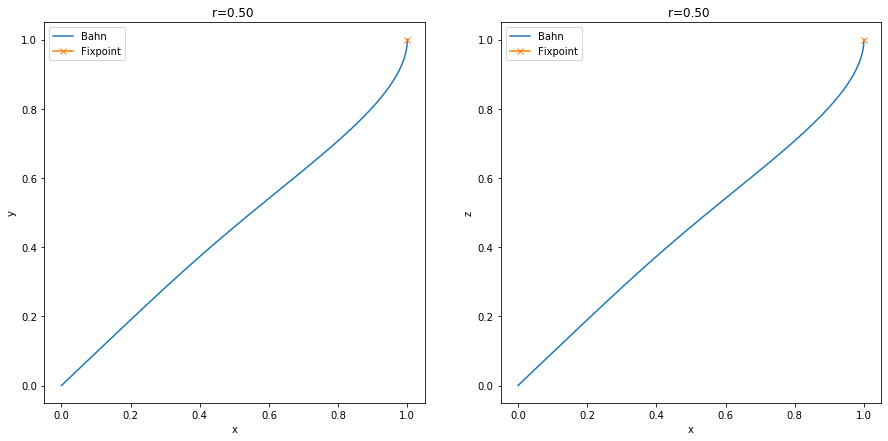

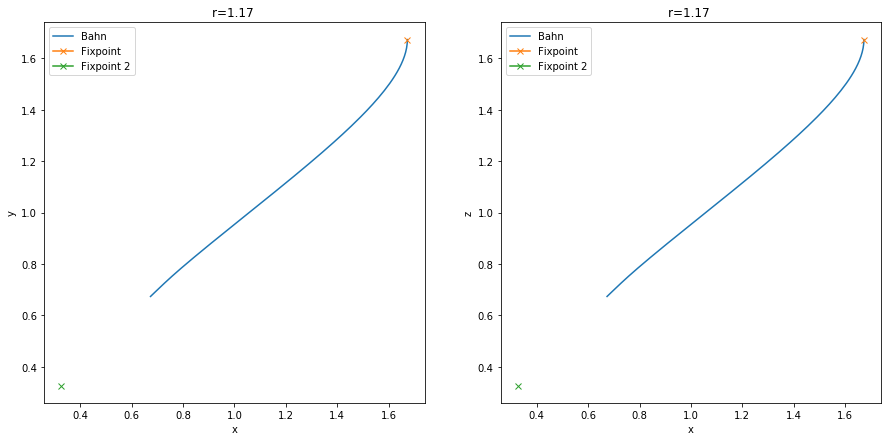

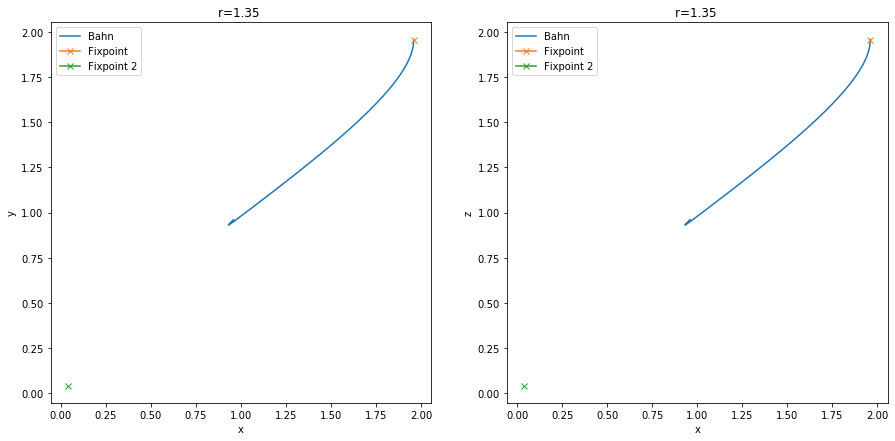

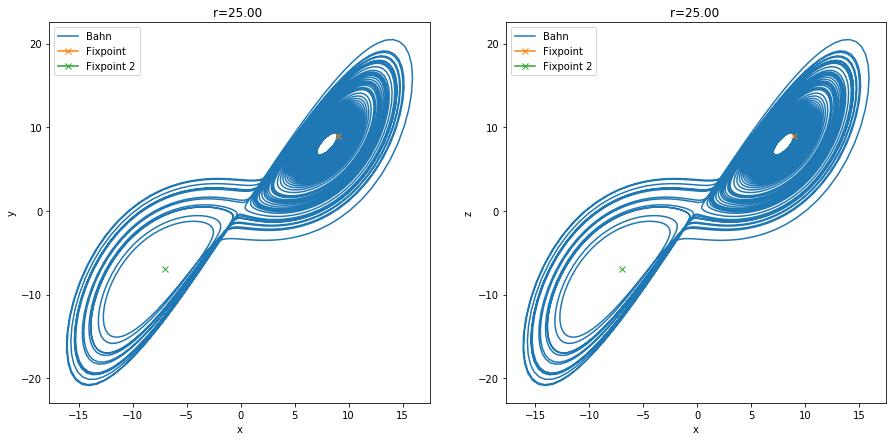

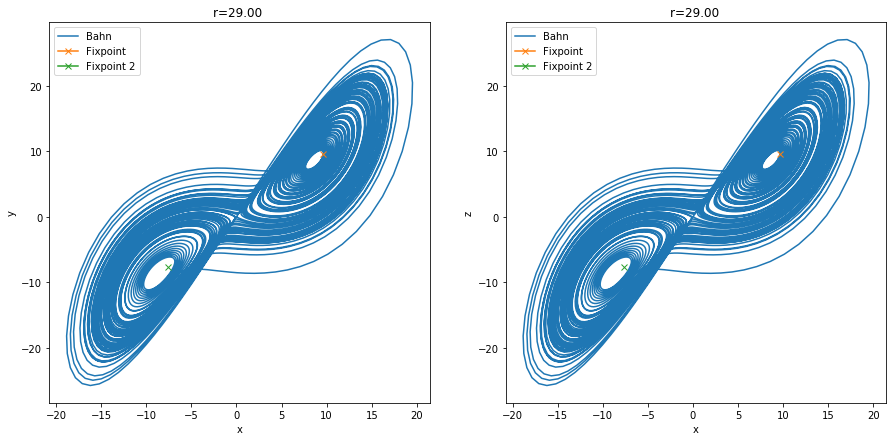

In [3]:
# Trage Werte für r,sigma, b ein. 
r_values=np.array([0.5, 1.17,1.3456, 25.0, 29.0])
sigma=10
b=8/3
epsilon=1 #störung

#startzeit ist 0
t =0

# stepsize ist 0.01
h = 0.01

# wir wollen 150 schritte gehen
n=10000


# definiere Schleife über r
for i in r_values:
    e ={'s':sigma,'b':b,'r':i}
    #print(e)
    # Defintion der Startwerte 
    if i>1:
        a0=np.sqrt(b*(i-1))
        x=a0 + epsilon
        y=a0 + epsilon
        z=i-1 + epsilon
        # führe alle start Daten der ODE in das 3 x 1 numpy array v
        v=np.array([x,y,z])
        x2=-a0 + epsilon
        y2=-a0 + epsilon
        z2=i-1 + epsilon
        v2=np.array([x2,y2,z2])
    
    if i<1:
        # führe alle start Daten der ODE in das 3 x 1 numpy array v
        print('hi')
        v=np.array([epsilon,  epsilon,  epsilon])
        
    # Lösen der ODE mit den Startwertdaten. Abspeichern von Variablen in rn zu den Zeiten tn
    vn,tn = rk4(v,t,abl,h,n,e)
    
    
    #print(vn[:,0])
    plt.figure(figsize=(15,7))
    plt.subplot(121)
    plt.plot(vn[:,0], vn[:,1], label='Bahn')
    plt.plot(v[0], v[1], label='Fixpoint', marker='x')
    if i>1:
        plt.plot(v2[0], v2[1], label='Fixpoint 2', marker='x')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(r'r=%.2f '% i)
    plt.legend()
    #plt.show()
    plt.subplot(122)
    plt.plot(vn[:,0], vn[:,1], label='Bahn')
    plt.plot(v[0], v[1], label='Fixpoint', marker='x')
    if i>1:
        plt.plot(v2[0], v2[1], label='Fixpoint 2', marker='x')
    plt.xlabel('x')
    plt.ylabel('z')
    plt.title(r'r=%.2f '% i)
    plt.legend()
    plt.show()


Beim Fixpunkt (0,0,0) sind für r<1 alle Lmabda reel und kleiner Null (für r>1 ein Eigenwert reel größer Null, somit nicht mehr stabil, sieht man auch weiter unten). Damit alle stabil. Sieht man auch am Plot, das wir konvergieren. Bei den Fixpunkten ungleich 0 gilt: Für 1<r<1.346 sind alle Fixpunkte Stabil, da die Eigenwerte alle reel kleiner 0 sind. Für 1.346...<r<24.74sind immer noch alle Realteile kleiner Null und somit stabil (exisiteren jetzt auch imaginaärteile). Für r>24.74 sind die Realtreile von 2 Eigenwerten größer 0. Das führt zu einer Oszillation um beide Fixpunkte (am anfang entfertn sich der wert noch langsam vm Fuixpunkt, bis er schneller Oszilliert)

#### b)

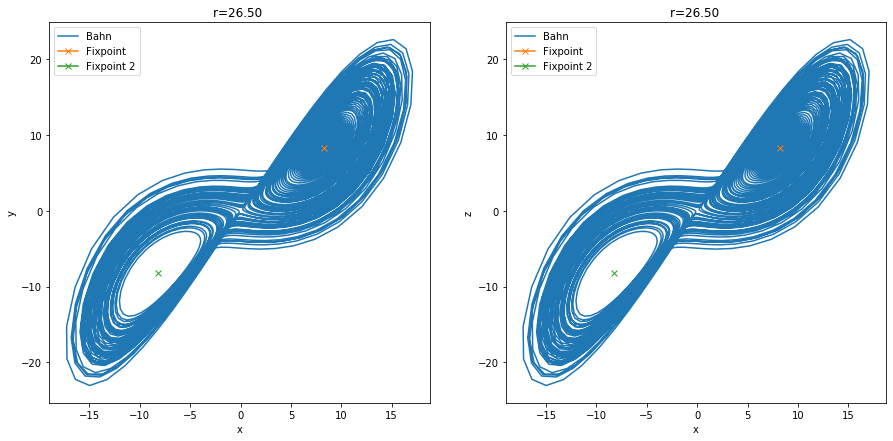

In [4]:
# Trage Werte für r,sigma, b ein. 
r_values=26.5
sigma=10
b=8/3
epsilon=0.01

#startzeit ist 0
t =0

# stepsize ist 0.01
h = 0.02

# wir wollen 150 schritte gehen
n=10000


# definiere Schleife über r
e ={'s':sigma,'b':b,'r':r_values}
#print(e)
# Defintion der Startwerte 

a0=np.sqrt(b*(r_values-1))
x=a0 + epsilon
y=a0 + epsilon
z=r_values-1 + epsilon
# führe alle start Daten der ODE in das 3 x 1 numpy array v
v=np.array([x,y,z])

x2=-a0 + epsilon
y2=-a0 + epsilon
z2=i-1 + epsilon
v2=np.array([x2,y2,z2])

# Lösen der ODE mit den Startwertdaten. Abspeichern von Variablen in rn zu den Zeiten tn
vn,tn = rk4(v,t,abl,h,n,e)




plt.figure(figsize=(15,7))
plt.subplot(121)
plt.plot(vn[:,0], vn[:,1], label='Bahn')
plt.plot(v[0], v[1], label='Fixpoint', marker='x')
plt.plot(v2[0], v2[1], label='Fixpoint 2', marker='x')
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'r=%.2f '% r_values)
plt.legend()
#plt.show()
plt.subplot(122)
plt.plot(vn[:,0], vn[:,1], label='Bahn')
plt.plot(v[0], v[1], label='Fixpoint', marker='x')
plt.plot(v2[0], v2[1], label='Fixpoint 2', marker='x')
plt.xlabel('x')
plt.ylabel('z')
plt.title(r'r=%.2f '% r_values)
plt.legend()
plt.show()

In [5]:
# finden der z_k (den Maxima in der z Richtung)
from scipy.signal import find_peaks

peaks, _ = find_peaks(vn[:,2])


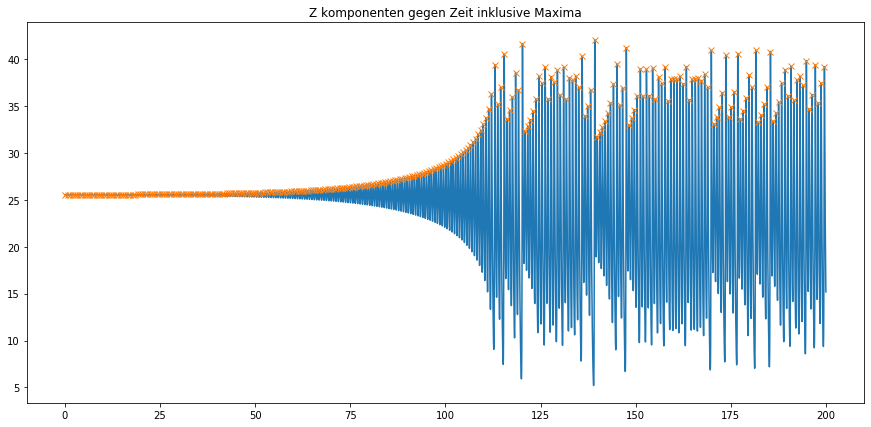

In [6]:
#Plotten der Maxima

plt.figure(figsize=(15,7))
plt.title('Z komponenten gegen Zeit inklusive Maxima')
plt.plot(tn, vn[:,2])
#plt.xlim((np.max(tn)))
plt.plot(tn[peaks], vn[:,2][peaks], "x")
plt.show()

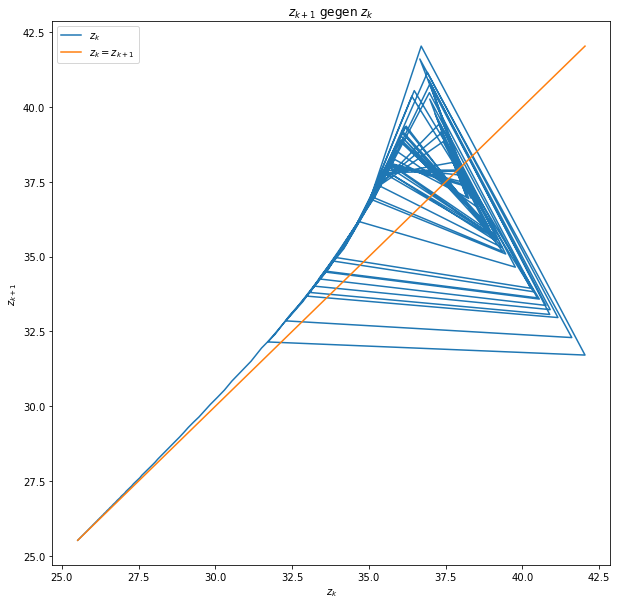

In [7]:
#Plotte z_k+1 gegen z_k
plt.figure(figsize=(10,10))
plt.title(r'$z_{k+1}$ gegen $z_k$')
zk=vn[:,2][peaks]
plt.plot(zk[:-1], zk[1:], label=r'$z_k$')
plt.xlabel(r'$z_k$')
plt.ylabel(r'$z_{k+1}$')
x=np.linspace(np.min(zk), np.max(zk), 1000)
plt.plot(x,x, label=r'$z_k=z_{k+1}$')
plt.legend()
plt.show()

Leider hat das bei uns nicht so gut geklappt. Scheinbar haben wir die Aufgabe nicht ganz richtig verstanden, da wir aus dem Verlauf den Bahnen (oszilation um die Beiden Fixpunkte) genau so etwas erwarten würden. Allerdings sollte wir eigenltich eine Schäne Kurve sehen, die einen eindetuigen Schnittpunkt hat. (Vielleicht gibt ja Teilpunkte fürs Versuchen :P)